## Import Library

In [22]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## Read Image & Grayscale

In [41]:
# Path dataset
path = "D:/Coding/Projects/number-plate-recognition/data/"
# path = path + 'K1_AB5092XM.jpg'
# path = path + 'K2_AB5575UT.jpg'
# path = path + 'K2_B6449EZH.jpg'
# path = path + 'K2_AB5889FX.jpg'
path = path + 'K2_AB4652YY.jpg'
# path = path + 'K4_AA1450UJ.png'     # Berhasil
# path = path + 'K3_AA8767FC.jpg'     # Berhasil
# path = "D:/Coding/Projects/number-plate-recognition/reference/image2.jpg"

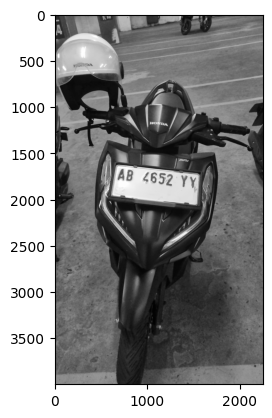

In [42]:
# Read image
img = cv2.imread(path)
# grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## Apply filter and find edges for localization

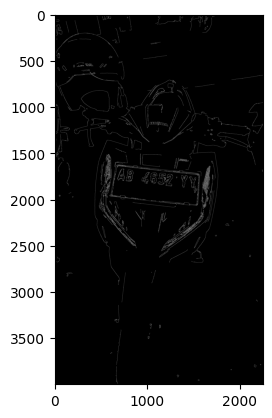

In [43]:
# Noise reduction
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
# Edge detection
edged = cv2.Canny(bfilter, 30, 200) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## Find Contours and Apply Mask

In [44]:
# Mencari contour
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Menemukan contour dari thresh
contours = imutils.grab_contours(keypoints)
# Mengurutkan contour
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]     # desecending

In [45]:
location = None
# Mencari lokasi dari plat nomer
for contour in contours:
    # Mengaproksimasi contour dengan menggunakan poligon yang lebih sederhana
    approx = cv2.approxPolyDP(contour, 10, True)    # nilai 10 tergantung dari gambarnya
    # Jika sudah ketemu 4 break
    if len(approx) == 4:
        location = approx
        break

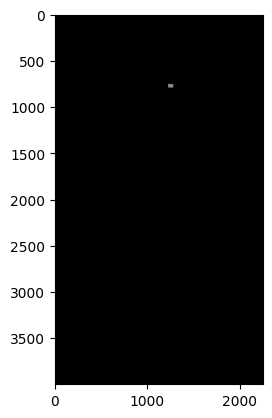

In [46]:
# Membuat array kosong
mask = np.zeros(gray.shape, np.uint8)
# Menggambar contour pada mask, sesuai dengan lokasi plat
new_image = cv2.drawContours(mask, [location], 0,255, -1)
# Menggabungkan masking dengan image plat nomer
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

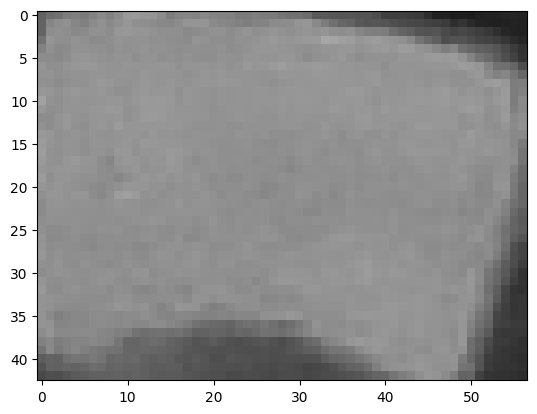

In [47]:
# Mengambil hasil crop plat nomer
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## Use Easy OCR To Read Text

In [48]:
# Melakukan text recognition dengan easy ocr
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[]

## Render Result

In [49]:
# Mengambil hasil text recognition
text = result[0][-2]
# Deklarasi font
font = cv2.FONT_HERSHEY_SIMPLEX
# Menulis text hasil prediksi ke image
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
# Menggambar kotak pada plat nomer
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

IndexError: list index out of range